# **Boston House Price Prediction Model**



---



This predictive Machine Learning model developed using the Boston House Price dataset aims to estimate residential property values based on various influencing factors. This dataset includes features such as the number of rooms, proximity to employment centers, crime rates, and local amenities, which are known to impact housing prices. By employing algorithms like linear regression, decision trees, or gradient boosting, the model analyzes these attributes to identify complex relationships and patterns. The model is trained on a portion of the dataset, allowing it to learn from historical data, and is then validated on a separate subset to ensure accuracy and robustness.



---



## **Dataset**

Each record in the database describes a house in Boston suburb or town. The data was drawn from Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978. Detailed attribute information can be found below:

**Attribute Information:**

* **CRIM:** Per capita crime rate by town
* **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS:** Proportion of non-retail business acres per town
* **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **NOX:** Nitric Oxide concentration (parts per 10 million)
* **RM:** The average number of rooms per dwelling
* **AGE:** Proportion of owner-occupied units built before 1940
* **DIS:** Weighted distances to five Boston employment centers
* **RAD:** Index of accessibility to radial highways
* **TAX:** Full-value property-tax rate per 10,000 dollars
* **PTRATIO:** Pupil-teacher ratio by town
* **LSTAT:** % lower status of the population
* **MEDV:** Median value of owner-occupied homes in 1000 dollars



---



## **Importing Libraries**

In [17]:
# Importing Libraries for Data Manipulation
import pandas as pd
import numpy as np

# Importing Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Libraries for Model Training
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split




---



## **Loading Data**

Now uploading local dataset to Colab by mounting from Google Drive

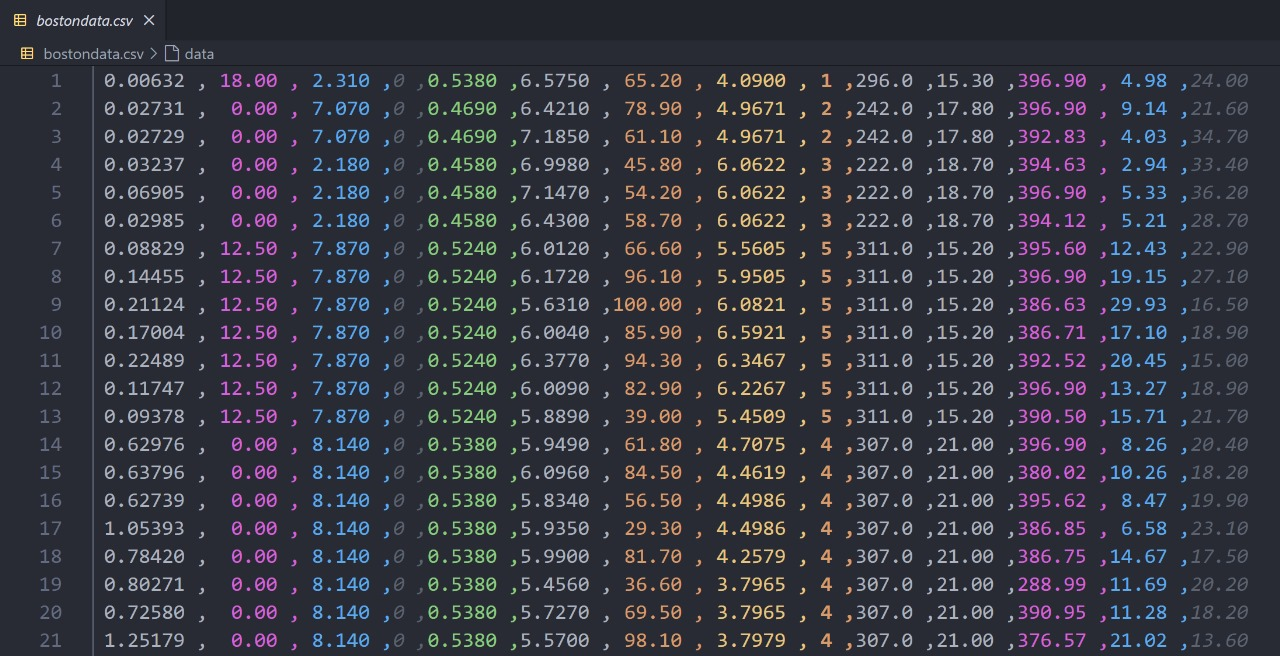

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_path = '/content/drive/My Drive/Colab Notebooks/bostondata.csv'
df = pd.read_csv(file_path, header=None)

header = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
            'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = header

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0




---



## **Exploratory Data Analysis**



### *Summary Statistics of this Data*

In [5]:
# Number of Unique Values in each column
df.nunique().to_frame().T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,504,26,76,2,81,446,356,412,9,66,46,357,455,229


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The table above provides a statistical summary of the dataset, including key metrics such as mean, standard deviation, minimum, and maximum values for each numerical feature. This helps us understand the data distribution and identify potential outliers.

### *Columns Analysis*

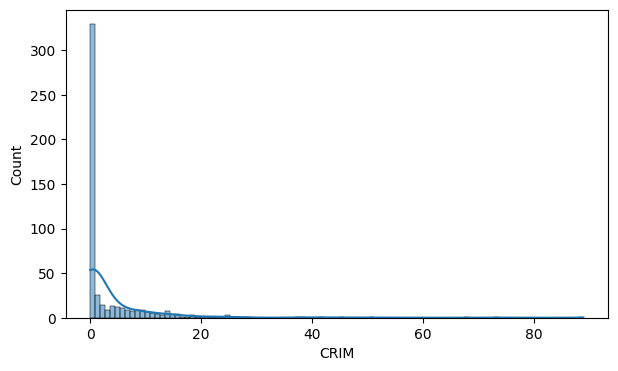

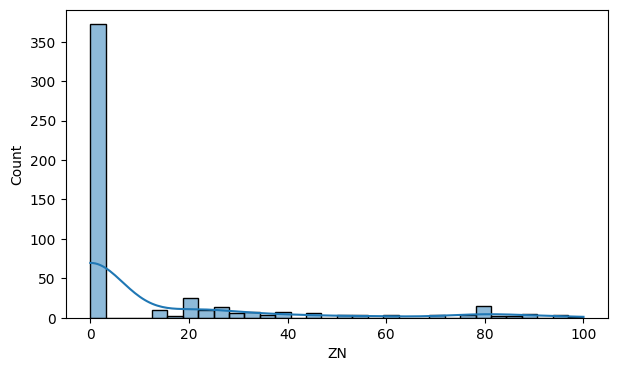

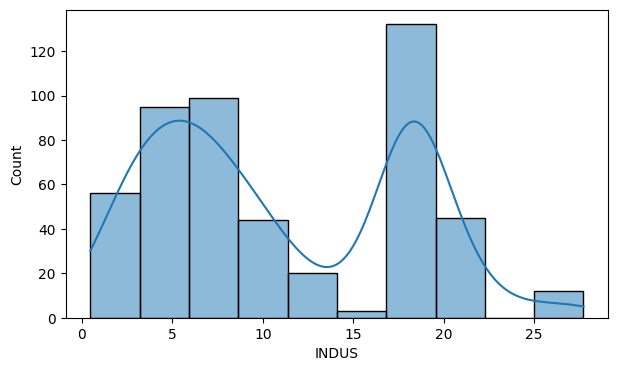

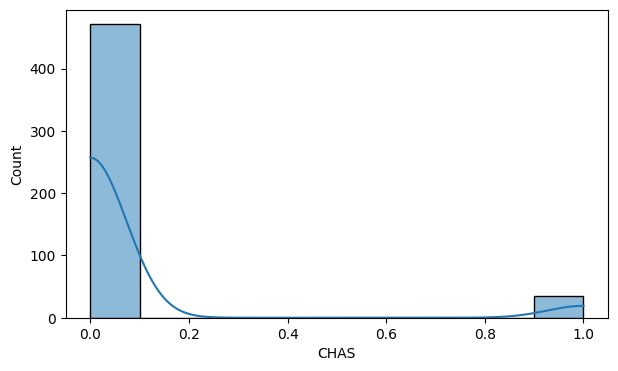

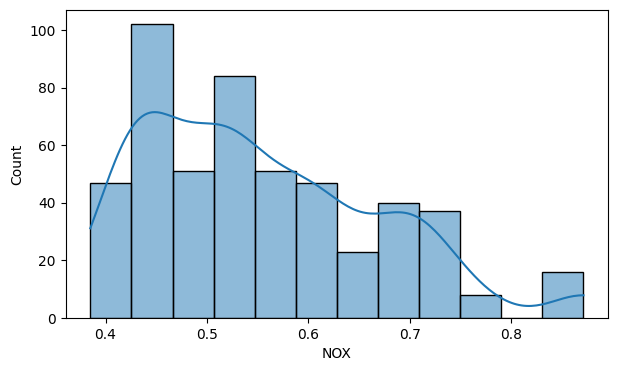

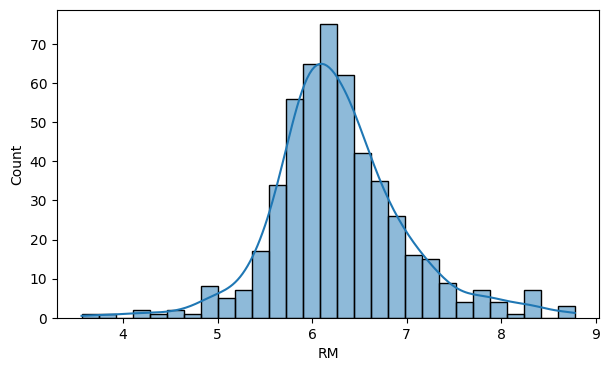

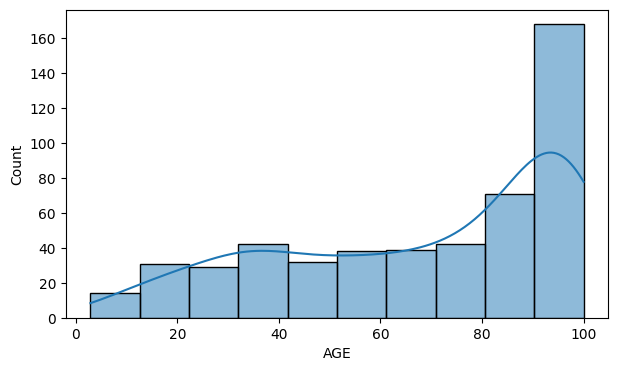

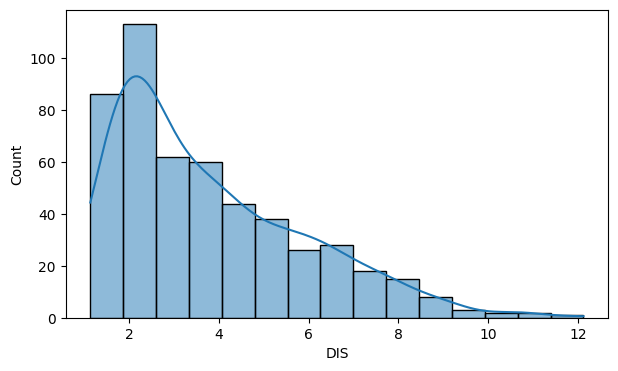

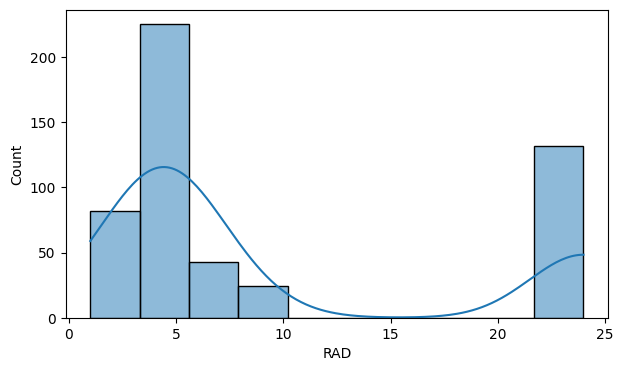

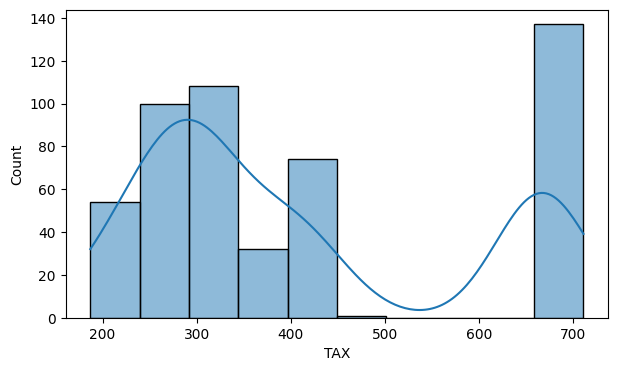

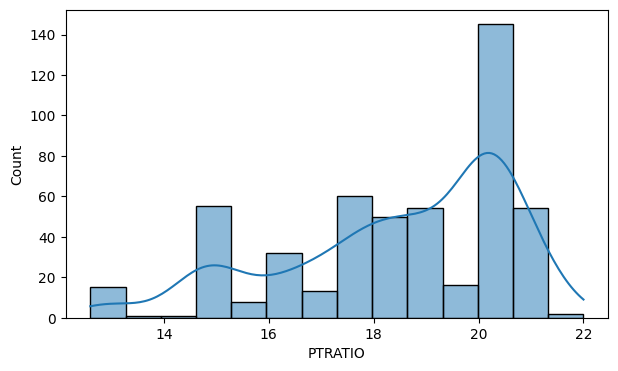

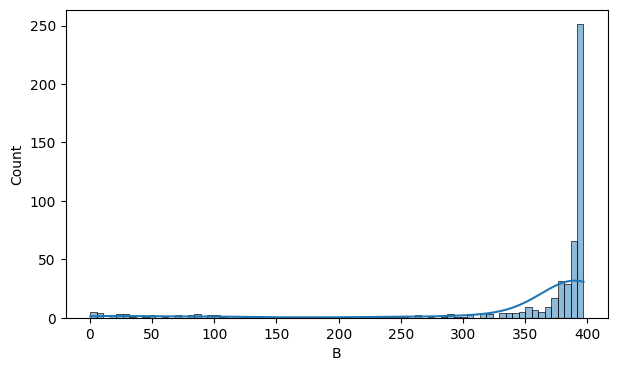

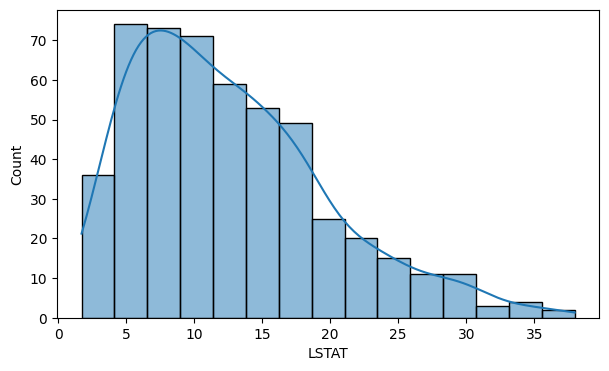

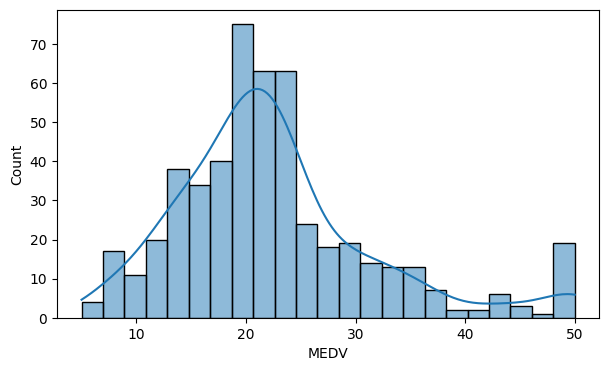

In [7]:
# Plotting all the columns to look at their distributions
for i in df.columns:

    plt.figure(figsize = (7, 4))

    sns.histplot(data = df, x = i, kde = True)

    plt.show()

### *Correlation Heatmap*

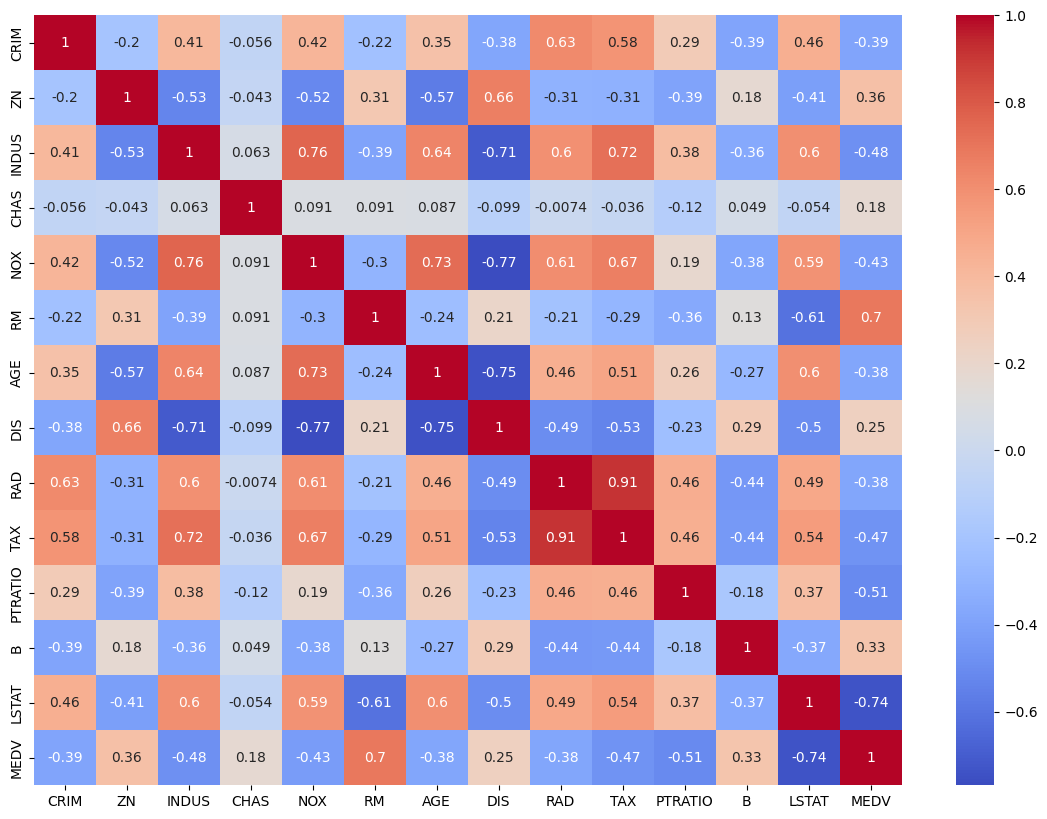

In [8]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

plt.show()

* **Visible High Correlation between RAD and TAX**


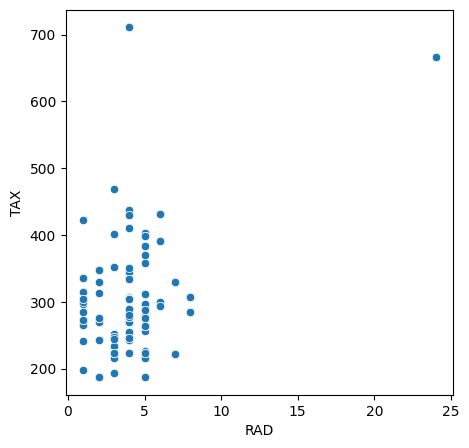

In [9]:
# Scatterplot to visulaize the relationship between RAD and TAX

plt.figure(figsize = (5, 5))
sns.scatterplot(x = 'RAD', y = 'TAX', data = df)
plt.show()



**High Positive Correlation Values Observed (>=0.7):**

*   RM and MEDV
*   INDUS and TAX
*   NOX and INDUS
*   AGE and NOX


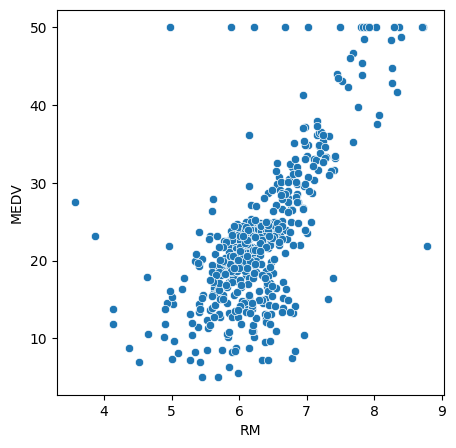

In [10]:
# Scatterplot to visulaize the relationship between above mentioned parameters

# 1) RM and MEDV
plt.figure(figsize = (5, 5))
sns.scatterplot(x = 'RM', y = 'MEDV', data = df)
plt.show()

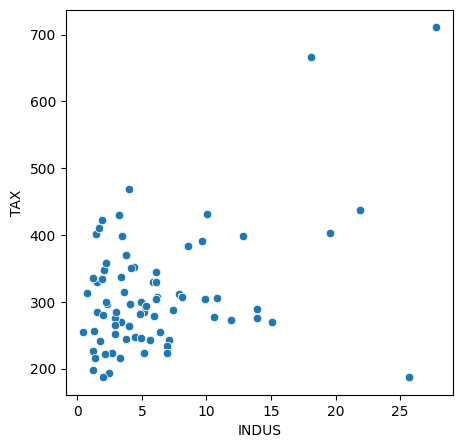

In [11]:
# 2) INDUS and TAX
plt.figure(figsize = (5, 5))
sns.scatterplot(x = 'INDUS', y = 'TAX', data = df)
plt.show()

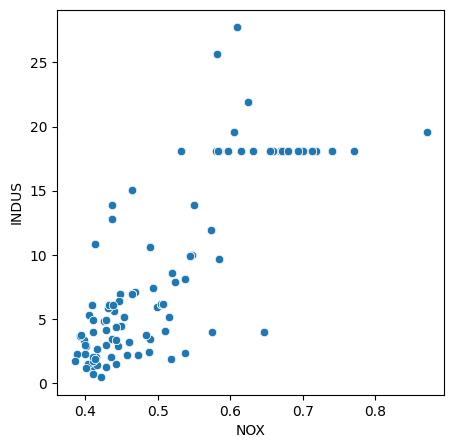

In [12]:
# 3) NOX and INDUS
plt.figure(figsize = (5, 5))
sns.scatterplot(x = 'NOX', y = 'INDUS', data = df)
plt.show()

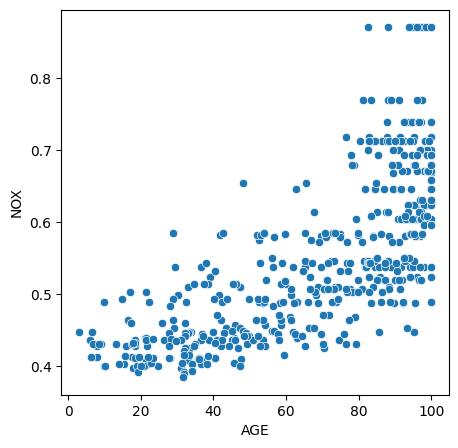

In [13]:
# 4) AGE and NOX
plt.figure(figsize = (5, 5))
sns.scatterplot(x = 'AGE', y = 'NOX', data = df)
plt.show()



---



# **Regression Model**

## **Data Preprocessing**
Data preprocessing is a crucial step in preparing our dataset for analysis and modeling. It involves transforming raw data into a clean and usable format, ensuring that it meets the requirements of the machine learning algorithms.
In this section, we address data quality issues by identifying and handling null values and outliers.
- **Null Values**: We'll examine the dataset for missing values and determine appropriate strategies for imputation or removal to ensure a complete dataset for analysis.
- **Outliers**: We'll identify any outliers that may skew our model's predictions, applying techniques such as transformation or removal as necessary to enhance the robustness of our regression model.


## *Missing Data*

Smartly removing/interpolating missing data in multiple steps to avoid important data loss.

In [14]:
# First of all removing data with house price missing (value to be predicted) (y parameter)
df.dropna(subset='MEDV',inplace=True)

# ZN column is supposed to have 0 have

# Removing data with more than 7 missing values (has less than half information which a row should have) (self chosen number)
df.dropna(thresh=7) # Minimum 7 Non NA values, else it will remove that row

# With rows having less than 8 missing values, using data interpolation
df.interpolate(method ='linear', limit_direction ='forward')

# Because the method is forward, the first NA value will remain untouched, so finally removing that single row
df.dropna()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## *Data Outliers*
**Using Interquartile Range (IQR) Method**
bold text
*Calculate IQR:*  IQR = Q3 - Q1 where Q1 is the 25th percentile and Q3 is the 75th percentile.

**Outlier Boundaries:**

*  Any data point beyond Q1 - 1.5 x IQR or Q3 + 1.5 x IQR can be considered a mild outlier.

* Points beyond Q1 - 3 x IQR or Q3 + 3 x IQR are often considered extreme outliers.

**Actions:**

*   Mild Outliers are transformed using square root transformation
*   Extreme Outliers are removed as they distort model's performance



In [16]:
# Columns to consider for outlier handling (analysed in EDA)
columns_to_check = ['CRIM', 'ZN', 'INDUS', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT']

for column in columns_to_check:
    # Calculate Q1 and Q3 for each column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for extreme and mild outliers
    lower_bound_extreme = Q1 - 3 * IQR
    upper_bound_extreme = Q3 + 3 * IQR
    lower_bound_mild = Q1 - 1.5 * IQR
    upper_bound_mild = Q3 + 1.5 * IQR

    # Remove extreme outliers
    df = df[(df[column] >= lower_bound_extreme) & (df[column] <= upper_bound_extreme)]

    # Transform Mild outliers
    # Create a boolean mask for mild outliers
    mild_outliers_mask = (df[column] < lower_bound_mild) | (df[column] > upper_bound_mild)

    # Transform mild outliers using square root transformation
    df.loc[mild_outliers_mask, column] = np.sqrt(np.abs(df.loc[mild_outliers_mask, column]))


df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,414.0,1.110840,1.929878,0.006320,0.073087,0.17841,0.845345,8.98296
ZN,414.0,6.153899,11.281869,0.000000,0.000000,0.00000,8.873267,45.00000
INDUS,414.0,10.231643,6.686169,0.460000,4.950000,8.14000,18.100000,27.74000
CHAS,414.0,0.079710,0.271172,0.000000,0.000000,0.00000,0.000000,1.00000
NOX,414.0,0.538105,0.108509,0.385000,0.448000,0.51500,0.605000,0.87100
RM,414.0,6.322860,0.673474,3.561000,5.907000,6.21750,6.623500,8.78000
AGE,414.0,65.680676,27.998652,2.900000,42.225000,70.50000,91.800000,100.00000
DIS,414.0,3.931376,1.926114,1.129600,2.358450,3.49520,5.287300,9.22290
RAD,414.0,7.792271,7.473948,1.000000,4.000000,5.00000,7.000000,24.00000
TAX,414.0,366.819621,151.284512,26.664583,276.000000,307.00000,403.000000,666.00000


## *Scaling Data*

Scaling ensures that all features contribute equally to the regression model by bringing them to a similar range. Without scaling, features with larger values can dominate the model, leading to biased results. It also improves the efficiency of gradient-based optimization, helping the model converge faster and more accurately.

In [17]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns = header)
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02,4.140000e+02
mean,-1.029772e-16,-7.723291e-17,1.716287e-17,-4.719789e-17,6.607704e-16,1.158494e-15,5.406303e-16,3.432574e-17,6.865147e-17,-6.865147e-17,-5.663746e-16,-8.795970e-16,-2.617337e-16,-1.973730e-16
std,1.001210e+00,1.001210e+00,1.001210e+00,1.001210e+00,1.001210e+00,1.001210e+00,1.001210e+00,1.001210e+00,1.001210e+00,1.001210e+00,1.001210e+00,1.001210e+00,1.001210e+00,1.001210e+00
min,-5.730187e-01,-5.461280e-01,-1.463239e+00,-2.943029e-01,-1.412697e+00,-4.105876e+00,-2.244988e+00,-1.456386e+00,-9.098925e-01,-2.251166e+00,-2.682397e+00,-4.649737e+00,-1.699626e+00,-2.053366e+00
25%,-5.383800e-01,-5.461280e-01,-7.908913e-01,-2.943029e-01,-8.313972e-01,-6.182316e-01,-8.387567e-01,-8.176199e-01,-5.080125e-01,-6.010497e-01,-6.536891e-01,1.406153e-01,-8.216770e-01,-5.754118e-01
50%,-4.837393e-01,-5.461280e-01,-3.132097e-01,-2.943029e-01,-2.131899e-01,-1.566316e-01,1.723352e-01,-2.267278e-01,-3.740525e-01,-3.958898e-01,1.319955e-01,2.645494e-01,-1.796375e-01,-2.117880e-01
75%,-1.377371e-01,2.413305e-01,1.178235e+00,-2.943029e-01,6.172378e-01,4.469419e-01,9.340066e-01,7.048207e-01,-1.061326e-01,2.394439e-01,8.825002e-01,3.184081e-01,6.772144e-01,3.277827e-01
max,4.084013e+00,3.447399e+00,2.621762e+00,3.397860e+00,3.071613e+00,3.652869e+00,1.227232e+00,2.750578e+00,2.171187e+00,1.979994e+00,1.726818e+00,3.184081e-01,3.035834e+00,3.072555e+00


## *Split the Dataset*

In [19]:
# Training and Testing data

X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## *Training the Model*

In [22]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

print(model1.intercept_)

0.0013613240902261223


## **Evaluation**

In this section, we assess the performance of our regression model using key evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared. These metrics help us understand how well the model predicts the target variable, identify areas for improvement, and ensure that the model generalizes well to unseen data.

### **Training Data**

First making predictions on training data, to check with testing data in the next section and check for overfitting and underfitting

In [23]:
y_prediction = model1.predict(X_train)

print('R^2:',r2_score(y_train, y_prediction))
print('Adjusted R^2:',1 - (1-r2_score(y_train, y_prediction))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',mean_absolute_error(y_train, y_prediction))
print('MSE:',mean_squared_error(y_train, y_prediction))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_prediction)))

R^2: 0.6820500939307514
Adjusted R^2: 0.6690111387922649
MAE: 0.3864965094946387
MSE: 0.33027463869015433
RMSE: 0.5746952572365238


#### **Visualizing Model Predictions**

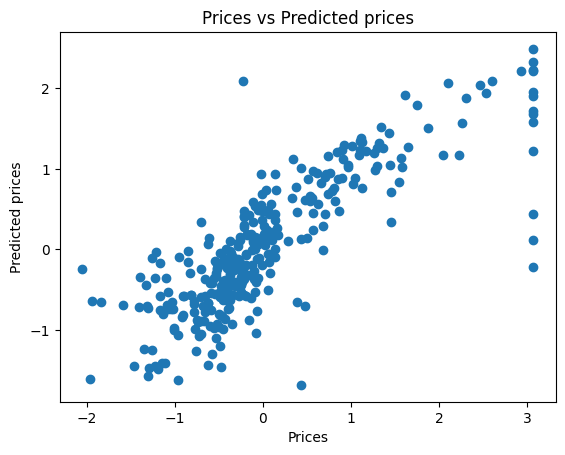

In [25]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_prediction)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

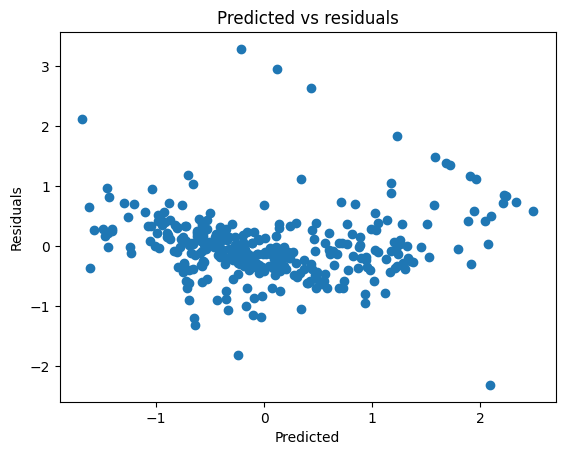

In [27]:
# Checking residuals
plt.scatter(y_prediction,y_train-y_prediction)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

### **Testing Data**

Now predicting testing data with the model

In [29]:
y_test_pred = model1.predict(X_test)

# Model Evaluation
acc_linreg = r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',mean_absolute_error(y_test, y_test_pred))
print('MSE:',mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_test_pred)))

R^2: 0.7892570496911393
Adjusted R^2: 0.7495518561546872
MAE: 0.32134692177095203
MSE: 0.1705133289430294
RMSE: 0.41293259612560185




---



# **Random Forest**

In [6]:
# Training and Testing data

X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()

reg.fit(X_train, y_train)

RandomForestRegressor()

In [11]:
y_prediction = reg.predict(X_train)

## **Evaluation**

### **Training**

In [12]:
# Model Evaluation
print('R^2:',r2_score(y_train, y_prediction))
print('Adjusted R^2:',1 - (1-r2_score(y_train, y_prediction))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',mean_absolute_error(y_train, y_prediction))
print('MSE:',mean_squared_error(y_train, y_prediction))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_prediction)))

R^2: 0.9771879985083541
Adjusted R^2: 0.9764275984586326
MAE: 0.9011386138613853
MSE: 1.9817562178217827
RMSE: 1.4077486344592143


#### **Visualizing**

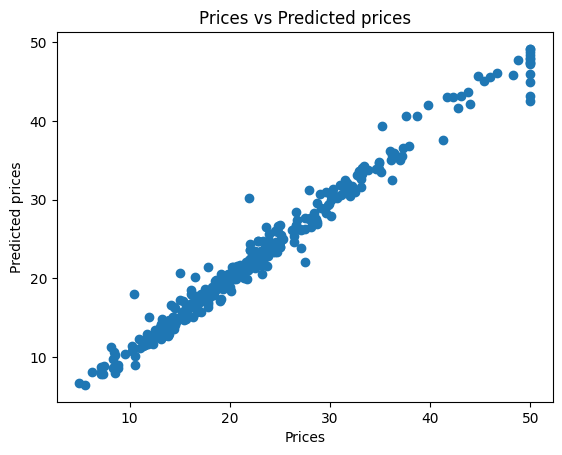

In [14]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_prediction)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

### **Testing Data**

In [15]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [16]:
# Model Evaluation
acc_rf = r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',mean_absolute_error(y_test, y_test_pred))
print('MSE:',mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_test_pred)))

R^2: 0.8827647175174609
Adjusted R^2: 0.865445868968904
MAE: 2.0789019607843144
MSE: 8.59730678431373
RMSE: 2.9321164343036807




---



# **XGBoost Regressor**

In [18]:
#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets
reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## **Evaluation**

### **Training Data**

In [19]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [21]:
# Model Evaluation
print('R^2:',r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',mean_absolute_error(y_train, y_pred))
print('MSE:',mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred)))

R^2: 0.9999969829984965
Adjusted R^2: 0.9999968824317798
MAE: 0.011182523717974735
MSE: 0.0002620971899759447
RMSE: 0.016189415986253015


#### Visualizing

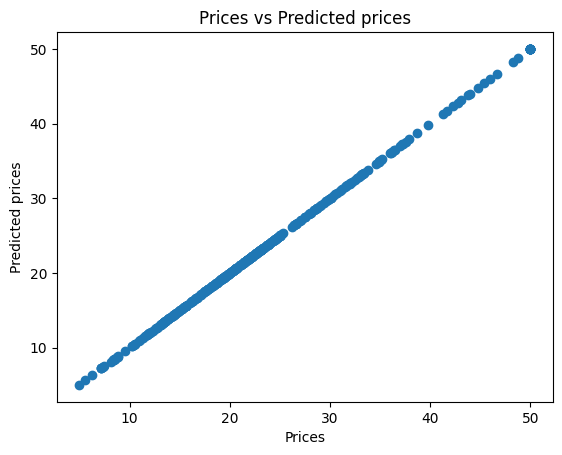

In [22]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

### **Testing**

In [23]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [25]:
# Model Evaluation
acc_xgb = r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',mean_absolute_error(y_test, y_test_pred))
print('MSE:',mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_test_pred)))

R^2: 0.9057837838492537
Adjusted R^2: 0.8918654791906208
MAE: 1.8908873698290656
MSE: 6.909231565384943
RMSE: 2.62854171840299
